# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')
print(data)

      Rank Release_Date                     Movie_Title USD_Production_Budget  \
0     5293     8/2/1915           The Birth of a Nation              $110,000   
1     5140     5/9/1916                     Intolerance              $385,907   
2     5230   12/24/1916    20,000 Leagues Under the Sea              $200,000   
3     5299    9/17/1920  Over the Hill to the Poorhouse              $100,000   
4     5222     1/1/1925                  The Big Parade              $245,000   
...    ...          ...                             ...                   ...   
5386  2950    10/8/2018                             Meg           $15,000,000   
5387   126   12/18/2018                         Aquaman          $160,000,000   
5388    96   12/31/2020                     Singularity          $175,000,000   
5389  1119   12/31/2020          Hannibal the Conqueror           $50,000,000   
5390  2517   12/31/2020  Story of Bonnie and Clyde, The           $20,000,000   

     USD_Worldwide_Gross US

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
print(data.shape)
print(data.isnull().values.sum())
print(data.duplicated().sum())
print(data.dtypes)

(5391, 6)
0
0
Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [5]:
chars_to_remove = [',', '$']
columns_to_clean = ['USD_Production_Budget', 
                    'USD_Worldwide_Gross',
                    'USD_Domestic_Gross']

for col in columns_to_clean:
    for char in chars_to_remove:
        # astype converts it to string
        data[col] = data[col].astype(str).str.replace(char, '', regex=False)
    data[col] = pd.to_numeric(data[col])

print(data)

      Rank Release_Date                     Movie_Title  \
0     5293     8/2/1915           The Birth of a Nation   
1     5140     5/9/1916                     Intolerance   
2     5230   12/24/1916    20,000 Leagues Under the Sea   
3     5299    9/17/1920  Over the Hill to the Poorhouse   
4     5222     1/1/1925                  The Big Parade   
...    ...          ...                             ...   
5386  2950    10/8/2018                             Meg   
5387   126   12/18/2018                         Aquaman   
5388    96   12/31/2020                     Singularity   
5389  1119   12/31/2020          Hannibal the Conqueror   
5390  2517   12/31/2020  Story of Bonnie and Clyde, The   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
0                    110000             11000000            10000000  
1                    385907                    0                   0  
2                    200000              8000000             8000000  
3      

**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [6]:
data['Release_Date'] = pd.to_datetime(data['Release_Date'])
print(data.dtypes)

Rank                              int64
Release_Date             datetime64[ns]
Movie_Title                      object
USD_Production_Budget             int64
USD_Worldwide_Gross               int64
USD_Domestic_Gross                int64
dtype: object


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [7]:
print(data.columns)
print(data['USD_Production_Budget'].mean())
print(data['USD_Worldwide_Gross'].mean())
print(data['USD_Worldwide_Gross'].min()) 
print(data['USD_Domestic_Gross'].min()) 

data['Profit'] = data['USD_Worldwide_Gross'] - data['USD_Production_Budget']
bottom_25 = data['USD_Worldwide_Gross'].quantile(0.25)
# the ones below 25%
low_performers = data[data['USD_Worldwide_Gross'] <= bottom_25]
print(low_performers['Profit'])
# probability (or proportion) of bottom 25% of films (by worldwide gross revenue) that made a profit 
# this is because > 0 gives boolean
print((low_performers['Profit'] > 0).mean()) 

print("Highest Production Budget:", data['USD_Production_Budget'].max())
print("Highest Worldwide Gross:", data['USD_Worldwide_Gross'].max())

print("Movie with Highest Budget:")
print(data[data['USD_Production_Budget'] == data['USD_Production_Budget'].max()][['Movie_Title', 'USD_Production_Budget']])
print("\nRevenue of Highest Budget Film:")
print(data[data['USD_Worldwide_Gross'] == data['USD_Worldwide_Gross'].max()][['Movie_Title', 'USD_Production_Budget']])


# lowest and highest revenue
lowest_budget = data['USD_Production_Budget'].min()
highest_budget = data['USD_Production_Budget'].max()

print("Revenue of Lowest Budget Film:")
print(data[data['USD_Production_Budget'] == lowest_budget][['Movie_Title', 'USD_Worldwide_Gross']])


print("\nRevenue of Highest Budget Film:")
print(data[data['USD_Production_Budget'] == highest_budget][['Movie_Title', 'USD_Worldwide_Gross']])



Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross'],
      dtype='object')
31113737.57837136
88855421.96271564
0
0
1         -385907
3         2900000
6        -2000000
8        -4000000
9          342000
          ...    
5386    -15000000
5387   -160000000
5388   -175000000
5389    -50000000
5390    -20000000
Name: Profit, Length: 1348, dtype: int64
0.12833827893175073
Highest Production Budget: 425000000
Highest Worldwide Gross: 2783918982
Movie with Highest Budget:
     Movie_Title  USD_Production_Budget
3529      Avatar              425000000

Revenue of Highest Budget Film:
     Movie_Title  USD_Production_Budget
3529      Avatar              425000000
Revenue of Lowest Budget Film:
            Movie_Title  USD_Worldwide_Gross
2427  My Date With Drew               181041

Revenue of Highest Budget Film:
     Movie_Title  USD_Worldwide_Gross
3529      Avatar           2783918982


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [8]:
print("Number of films with $0 domestic gross:", (data['USD_Domestic_Gross'] == 0).sum())

zero_domestic = data[data['USD_Domestic_Gross'] == 0]
highest_budget_zero_domestic = zero_domestic[zero_domestic['USD_Production_Budget'] == zero_domestic['USD_Production_Budget'].max()]

print("\nHighest budget film(s) with $0 domestic gross:")
print(highest_budget_zero_domestic[['Movie_Title', 'USD_Production_Budget']])


Number of films with $0 domestic gross: 512

Highest budget film(s) with $0 domestic gross:
      Movie_Title  USD_Production_Budget
5388  Singularity              175000000


**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [9]:
print("Number of films with $0 worldwide gross:", (data['USD_Worldwide_Gross'] == 0).sum())

zero_worldwide = data[data['USD_Worldwide_Gross'] == 0]
highest_budget_zero_worldwide = zero_worldwide[zero_worldwide['USD_Production_Budget'] == zero_worldwide['USD_Production_Budget'].max()]

print("\nHighest budget film(s) with $0 worldwide gross:")
print(highest_budget_zero_worldwide[['Movie_Title', 'USD_Production_Budget']])


Number of films with $0 worldwide gross: 357

Highest budget film(s) with $0 worldwide gross:
      Movie_Title  USD_Production_Budget
5388  Singularity              175000000


### Filtering on Multiple Conditions

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [10]:
# using .query() function 
international_only = data.query("USD_Worldwide_Gross > 0 and USD_Domestic_Gross == 0")
print(international_only[['Movie_Title', 'USD_Worldwide_Gross', 'USD_Domestic_Gross']])


                  Movie_Title  USD_Worldwide_Gross  USD_Domestic_Gross
71                   Carousel                 3220                   0
1579  Everything Put Together                 7890                   0
1744                 The Hole             10834406                   0
2155                  Nothing                63180                   0
2203                The Touch              5918742                   0
...                       ...                  ...                 ...
5340      Queen of the Desert              1480089                   0
5348        Chāi dàn zhuānjiā             58807172                   0
5360                Departure                27561                   0
5372                Ballerina             48048527                   0
5374     Polina danser sa vie                36630                   0

[155 rows x 3 columns]


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [11]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

unreleased = data[data['Release_Date']>scrape_date]
print(unreleased[['Release_Date','Movie_Title']])

print("Number of unreleased films:", len(unreleased))

data_clean = data[data["Release_Date"]<=scrape_date]
print("Number of released films:", len(data_clean))


     Release_Date                     Movie_Title
5384   2018-09-03               A Wrinkle in Time
5385   2018-10-08                  Amusement Park
5386   2018-10-08                             Meg
5387   2018-12-18                         Aquaman
5388   2020-12-31                     Singularity
5389   2020-12-31          Hannibal the Conqueror
5390   2020-12-31  Story of Bonnie and Clyde, The
Number of unreleased films: 7
Number of released films: 5384


In [12]:
print(data.columns)

Index(['Rank', 'Release_Date', 'Movie_Title', 'USD_Production_Budget',
       'USD_Worldwide_Gross', 'USD_Domestic_Gross', 'Profit'],
      dtype='object')


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [13]:
# loss movies out of the whole movies
loss_percentage = (data['USD_Production_Budget'] > data['USD_Worldwide_Gross']).mean()*100
print(loss_percentage)

37.3585605639028


# Seaborn for Data Viz: Bubble Charts

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



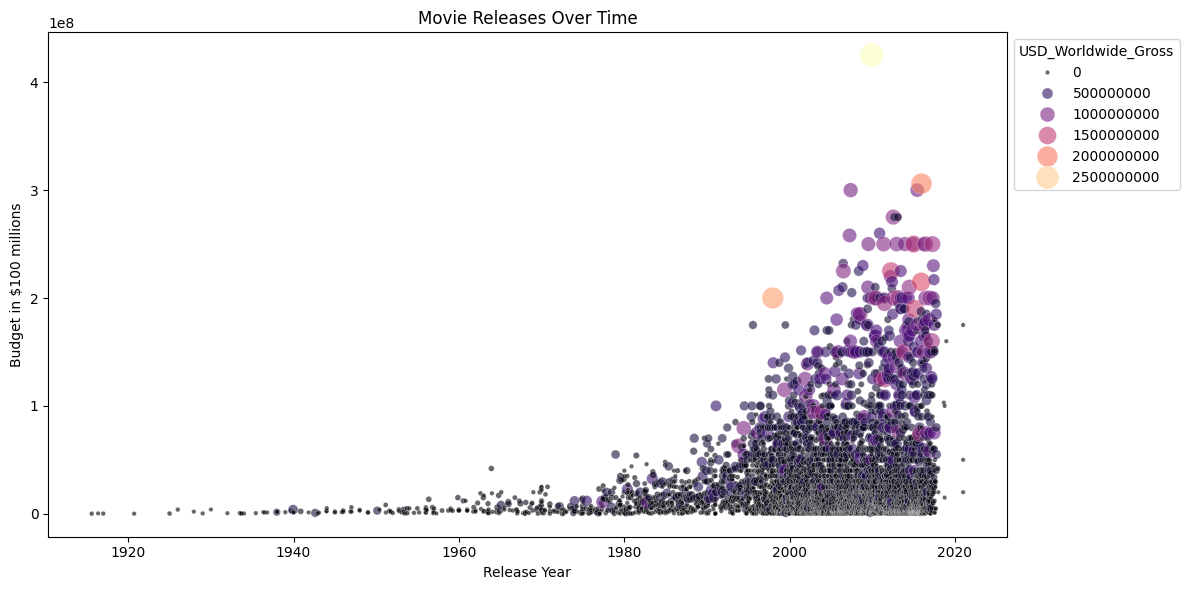

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Create the bubble chart
sns.scatterplot(
    data=data,
    x='Release_Date',
    y='USD_Production_Budget',
    # size of each bubble
    size='USD_Worldwide_Gross',
    # sets the color of the bubble 
    hue='USD_Worldwide_Gross',
    sizes=(10, 300),
    palette='magma',
    # transparency of the bubble
    alpha=0.6,
    legend='brief'
)

# Labels and title
plt.xlabel("Release Year")
plt.ylabel("Budget in $100 millions")
plt.title("Movie Releases Over Time")

# Improve legend and layout
plt.legend(title='USD_Worldwide_Gross', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [15]:
data_clean['Decade'] = (data_clean['Release_Date'].dt.year // 10) * 10
print(data_clean[['Release_Date','Decade','Movie_Title']])

     Release_Date  Decade                       Movie_Title
0      1915-08-02    1910             The Birth of a Nation
1      1916-05-09    1910                       Intolerance
2      1916-12-24    1910      20,000 Leagues Under the Sea
3      1920-09-17    1920    Over the Hill to the Poorhouse
4      1925-01-01    1920                    The Big Parade
...           ...     ...                               ...
5379   2017-10-02    2010            John Wick: Chapter Two
5380   2017-10-03    2010                Kong: Skull Island
5381   2017-12-05    2010  King Arthur: Legend of the Sword
5382   2017-12-05    2010                          Snatched
5383   2017-12-31    2010                The Thousand Miles

[5384 rows x 3 columns]


/var/folders/gb/htxs6lsn7l717xys7y7wf5l80000gn/T/ipykernel_6460/2311856156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Decade'] = (data_clean['Release_Date'].dt.year // 10) * 10


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [16]:
# Old films (before or in 1969)
old_films = data_clean[data_clean['Release_Date'].dt.year <= 1969]

# New films (1970 and after)
new_films = data_clean[data_clean['Release_Date'].dt.year >= 1970]

print("Number of old films:", len(old_films))

most_expensive_old_film = old_films[old_films['USD_Production_Budget'] == old_films['USD_Production_Budget'].max()]
print("Most expensive film before 1970:")
print(most_expensive_old_film[['Movie_Title', 'USD_Production_Budget', 'Release_Date']])



Number of old films: 153
Most expensive film before 1970:
    Movie_Title  USD_Production_Budget Release_Date
109   Cleopatra               42000000   1963-12-06


# Seaborn Regression Plots

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

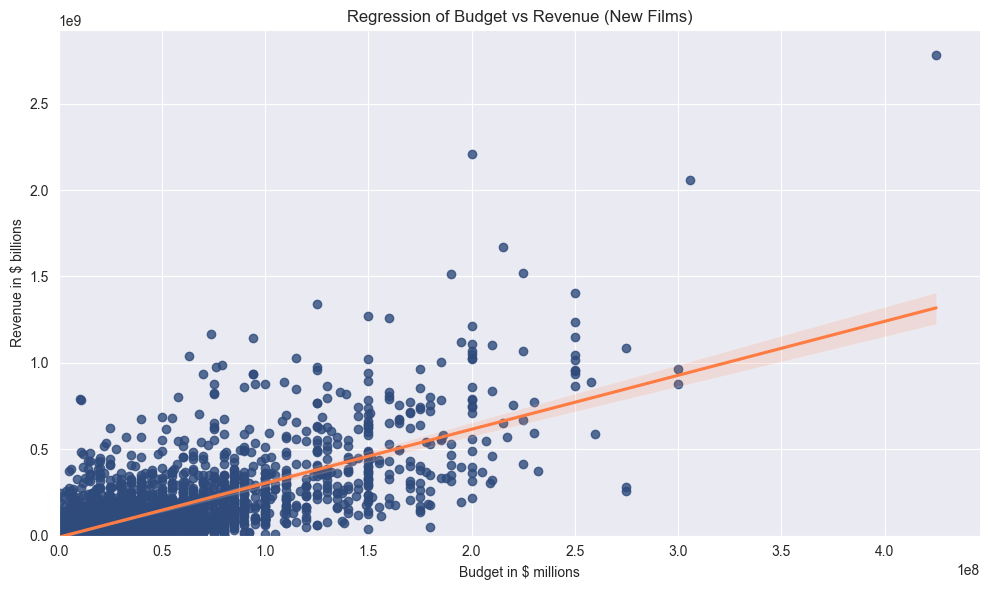

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style to 'darkgrid'
sns.set_style("darkgrid")

# Create the regression plot
plt.figure(figsize=(10, 6))
sns.regplot(
    data=new_films,
    x='USD_Production_Budget',
    y='USD_Worldwide_Gross',
    scatter_kws={'color': '#2f4b7c'},    # dark blue dots
    line_kws={'color': '#ff7c43'}        # orange regression line
)

# Set axis limits (no negative values)
plt.xlim(0)
plt.ylim(0)

# Axis labels
plt.xlabel("Budget in $ millions")
plt.ylabel("Revenue in $ billions")
plt.title("Regression of Budget vs Revenue (New Films)")

plt.tight_layout()
plt.show()


# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [18]:
from sklearn.linear_model import LinearRegression
import numpy as np

# 1. Prepare data
X = old_films[['USD_Production_Budget']] 
y = old_films['USD_Worldwide_Gross']     

# 2. Create and fit model
regression = LinearRegression()
regression.fit(X, y)

# 3. Get results
intercept = regression.intercept_
slope = regression.coef_[0]
r_squared = regression.score(X, y)

# 4. Display results
print("Intercept:", intercept)
print("Slope:", slope)
print("R-squared:", r_squared)


Intercept: 22821538.635080386
Slope: 1.6477131440107315
R-squared: 0.02937258620576877


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [21]:
# Predict revenue for a $350M budget
predicted_revenue = regression.predict([[350_000_000]])
print("Estimated Global Revenue:", predicted_revenue[0])

Estimated Global Revenue: 599521139.0388364


/Users/apple/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
